In [14]:
%matplotlib inline

from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt

In [15]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [24]:
seed()

def play_game(strategie):
    '''Simule une partie de jeu Monty Hall
    
    Cette fonction simule le choix de la porte par le participant,
    l'élimination d'une mauvaise porte par l epréesntateur, et le
    choix final. Elle ne retourne que le résultat de la partie, parce
    que nous n'aurons besoin que du résultat pour effecter nos calculs
    
    Args:
        strategie (Strategie): La stratégie du joueur
    
    Return:
        bool: Le jour a-t-il gagné ?
    '''
    
    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    premier_choix = randint(0,2)
    
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError('Strategie non reconnue!')
        
    return deuxieme_choix == bonne_porte

In [39]:
def play(strategie, nb_tours):

    '''Simule une suite de tours du jeu.

    

    Cette fonction renvoie les résultats de plusieurs parties

    du jeu Monty Hall sous forme d'une liste de gains par le 

    joueur.

    

    Args:

        strategie (Strategie): La strategie du joueur

        nb_tours (int): Nombre de tours

        

    Returns:

        list: Liste des gains du joueurs à chaque partie

    '''

    

    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 

    # le cours "Apprenez à programmer en Python" sur OpenClassrooms

    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [41]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."

      .format(sum(play(Strategie.CHANGER, 100000))))

      

print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."

      .format(sum(play(Strategie.GARDER, 100000))))

En changeant de porte, le joueur a gagné 66192 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 33276 sur 10000 parties.


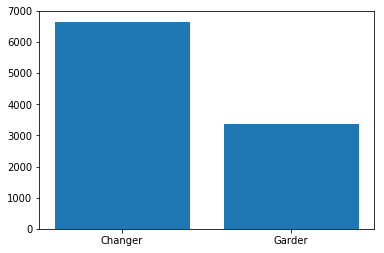

In [49]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])